<a href="https://colab.research.google.com/github/clustering-jun/GNU-MachineLearning/blob/main/L8-2_%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **랜덤 포레스트 회귀 모델 훈련하기**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

boston = pd.read_csv('boston.csv')

features = boston.drop(columns = 'PRICE').iloc[:, 0:2]
target = boston['PRICE']

model = RandomForestRegressor(random_state=0, n_jobs = -1)
model.fit(features, target)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [ ]:
X = [[0.02, 16]]
model.predict(X)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([30.316])

## **랜덤 포레스트 분류 모델 훈련하기**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()
features = iris.data
target = iris.target

model = RandomForestClassifier(random_state=0, n_jobs=-1)
model.fit(features, target)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [ ]:
observation = [[5, 4, 3, 2]]

print(model.predict(observation))
print(model.predict_proba(observation))

[1]
[[0.03 0.56 0.41]]


- 랜덤 포레스트 역시 criterion을 설정하여 다른 불순도를 사용하여 모델을 훈련시킬 수 있음

In [ ]:
model_entropy = RandomForestClassifier(criterion='entropy', random_state = 0)
model_entropy.fit(features, target)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
print(model_entropy.predict(observation))
print(model_entropy.predict_proba(observation))

[1]
[[0.03 0.55 0.42]]


## **랜덤 포레스트에서 중요한 특성 구분하기**

In [ ]:
from multiprocessing.spawn import import_main_path
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()
features = iris.data
target = iris.target

model = RandomForestClassifier(random_state=0, n_jobs=-1)
model.fit(features, target)

importances = model.feature_importances_
print(importances)

[0.09090795 0.02453104 0.46044474 0.42411627]


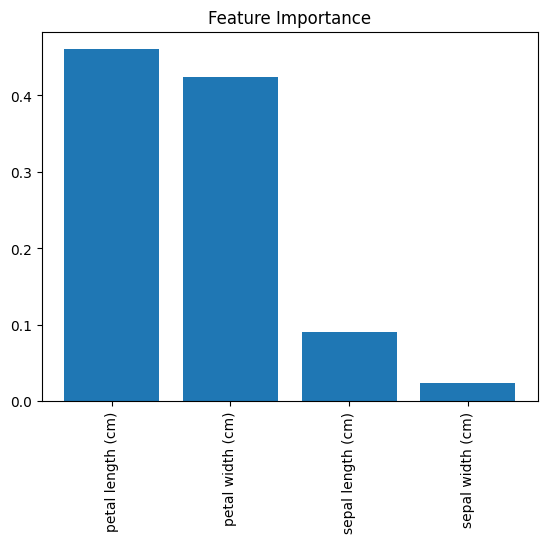

In [ ]:
import matplotlib.pyplot as plt

indices = np.argsort(importances)[::-1]
names = [iris.feature_names[i] for i in indices]

plt.figure()
plt.title('Feature Importance')
plt.bar(range(features.shape[1]), importances[indices])
plt.xticks(range(features.shape[1]), names, rotation = 90)
plt.show()

- 결정 트리와 랜덤 포레스트의 특성 중요도를 비교해보면 랜덤 포레스트가 결정 트리보다 한 특성에 치우치지 않았음을 알 수 있음

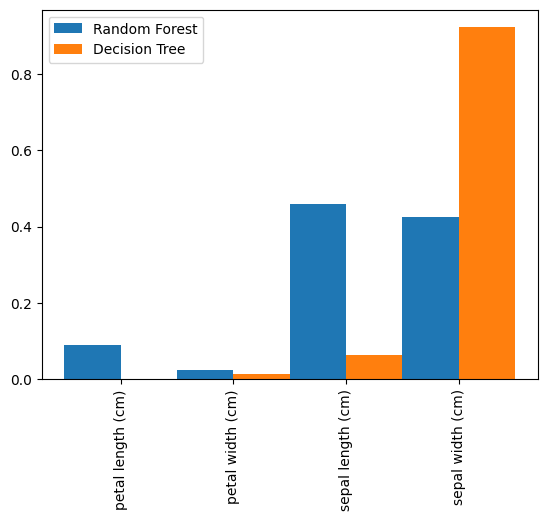

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model1 = RandomForestClassifier(random_state = 0, n_jobs = -1)
model1.fit(features, target)

model2 = DecisionTreeClassifier(random_state = 0)
model2.fit(features, target)

fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(features.shape[1]) - 0.25, model1.feature_importances_, 0.5, label = 'Random Forest')
rects2 = ax.bar(np.arange(features.shape[1]) + 0.25, model2.feature_importances_, 0.5, label = 'Decision Tree')
plt.xticks(range(features.shape[1]), names, rotation = 90)
plt.legend()
plt.show()

## **랜덤 포레스트에서 중요한 특성 선택하기**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel

iris = datasets.load_iris()
features = iris.data
target = iris.target

model = RandomForestClassifier(random_state = 0, n_jobs = -1)

selector = SelectFromModel(model, threshold = 0.3)
features_important = selector.fit_transform(features, target)
features_important[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [ ]:
model.fit(features_important, target)

observation = [[3, 2]]

print(model.predict(observation))
print(model.predict_proba(observation))

[2]
[[0.         0.37157143 0.62842857]]


### **`titanic.csv` 파일을 불러오고, RandomForestClassifier 함수를 사용하여 Survived에 대한 결정 트리 분류 모델을 학습시킨 후 특성 중요도를 시각화 해보시오.**

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt

titanic = pd.read_csv('titanic.csv')

features = titanic.drop(columns = 'Survived')
target = titanic['Survived']

features = features.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

features_e = pd.get_dummies(features)

features_e = features_e.fillna(features_e.median(numeric_only=True))

model = RandomForestClassifier()
model.fit(features_e, target)

importances = model.feature_importances_
print(importances)

[0.08596913 0.25109332 0.04857699 0.03894692 0.25186095 0.11282193
 0.17626245 0.01234669 0.00748513 0.01463649]


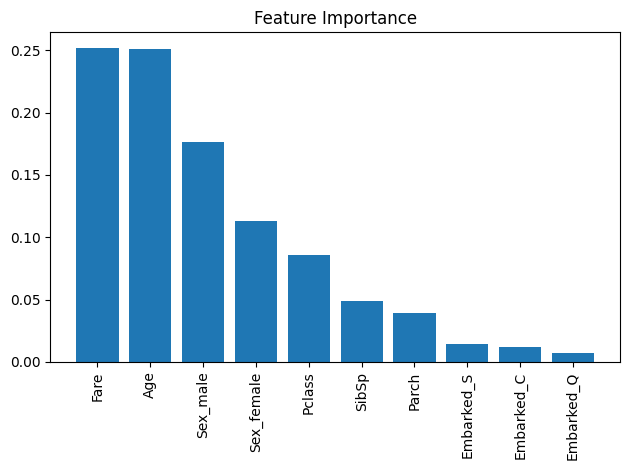

In [6]:
import matplotlib.pyplot as plt
import numpy as np

indices = np.argsort(importances)[::-1]

sorted_importances = importances[indices]
sorted_names = np.array(features_e.columns)[indices]

plt.figure()
plt.title('Feature Importance')

x = range(len(sorted_importances))

plt.bar(x, sorted_importances)
plt.xticks(x, sorted_names, rotation=90)

plt.tight_layout()
plt.show()
